In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.shape

(150, 6)

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


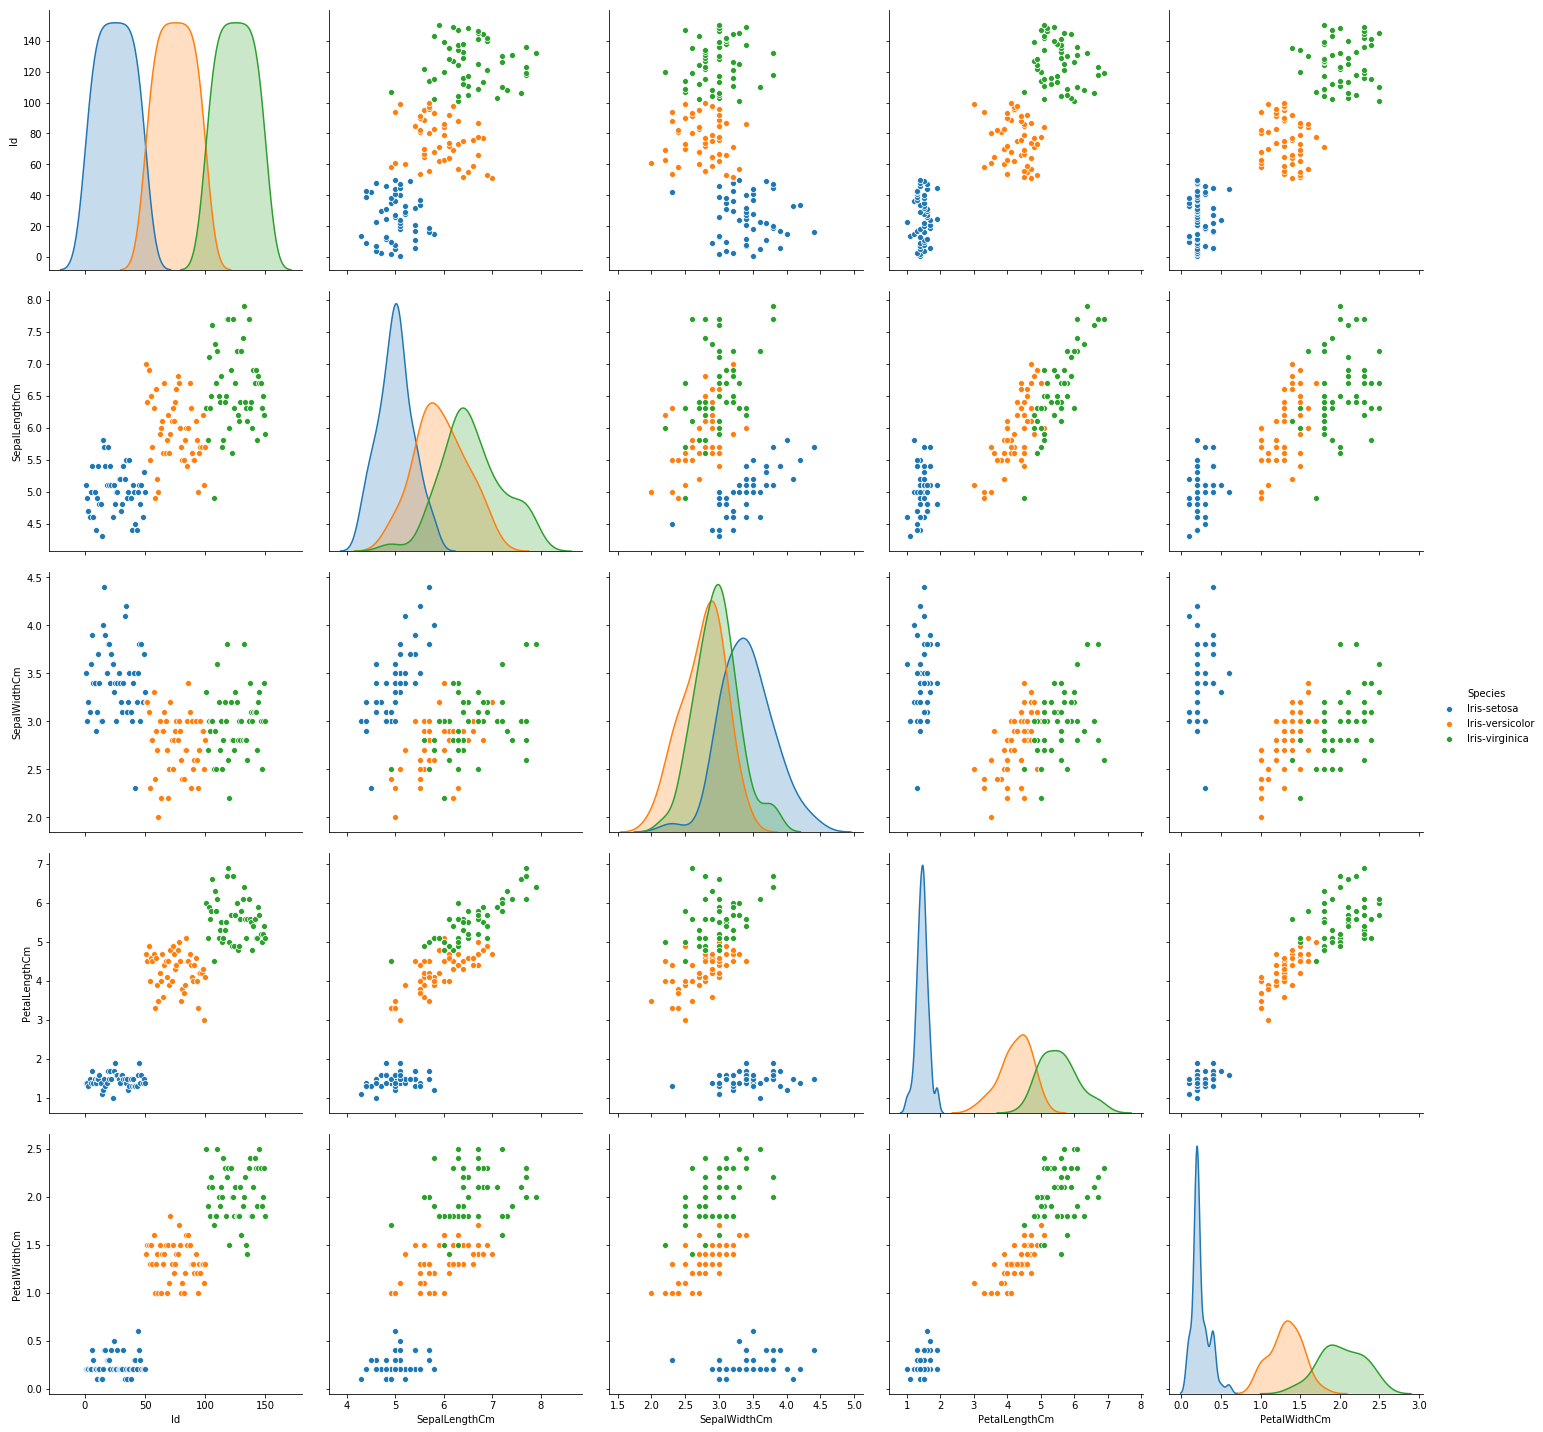

In [7]:
sns.pairplot(df, hue='Species',size=4)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('Species',axis=1))
scaled_data = scaler.transform(df.drop('Species',axis=1))

scaled_data
df_feat = pd.DataFrame(scaled_data, columns=df.columns[:-1])
df_feat.head()



/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


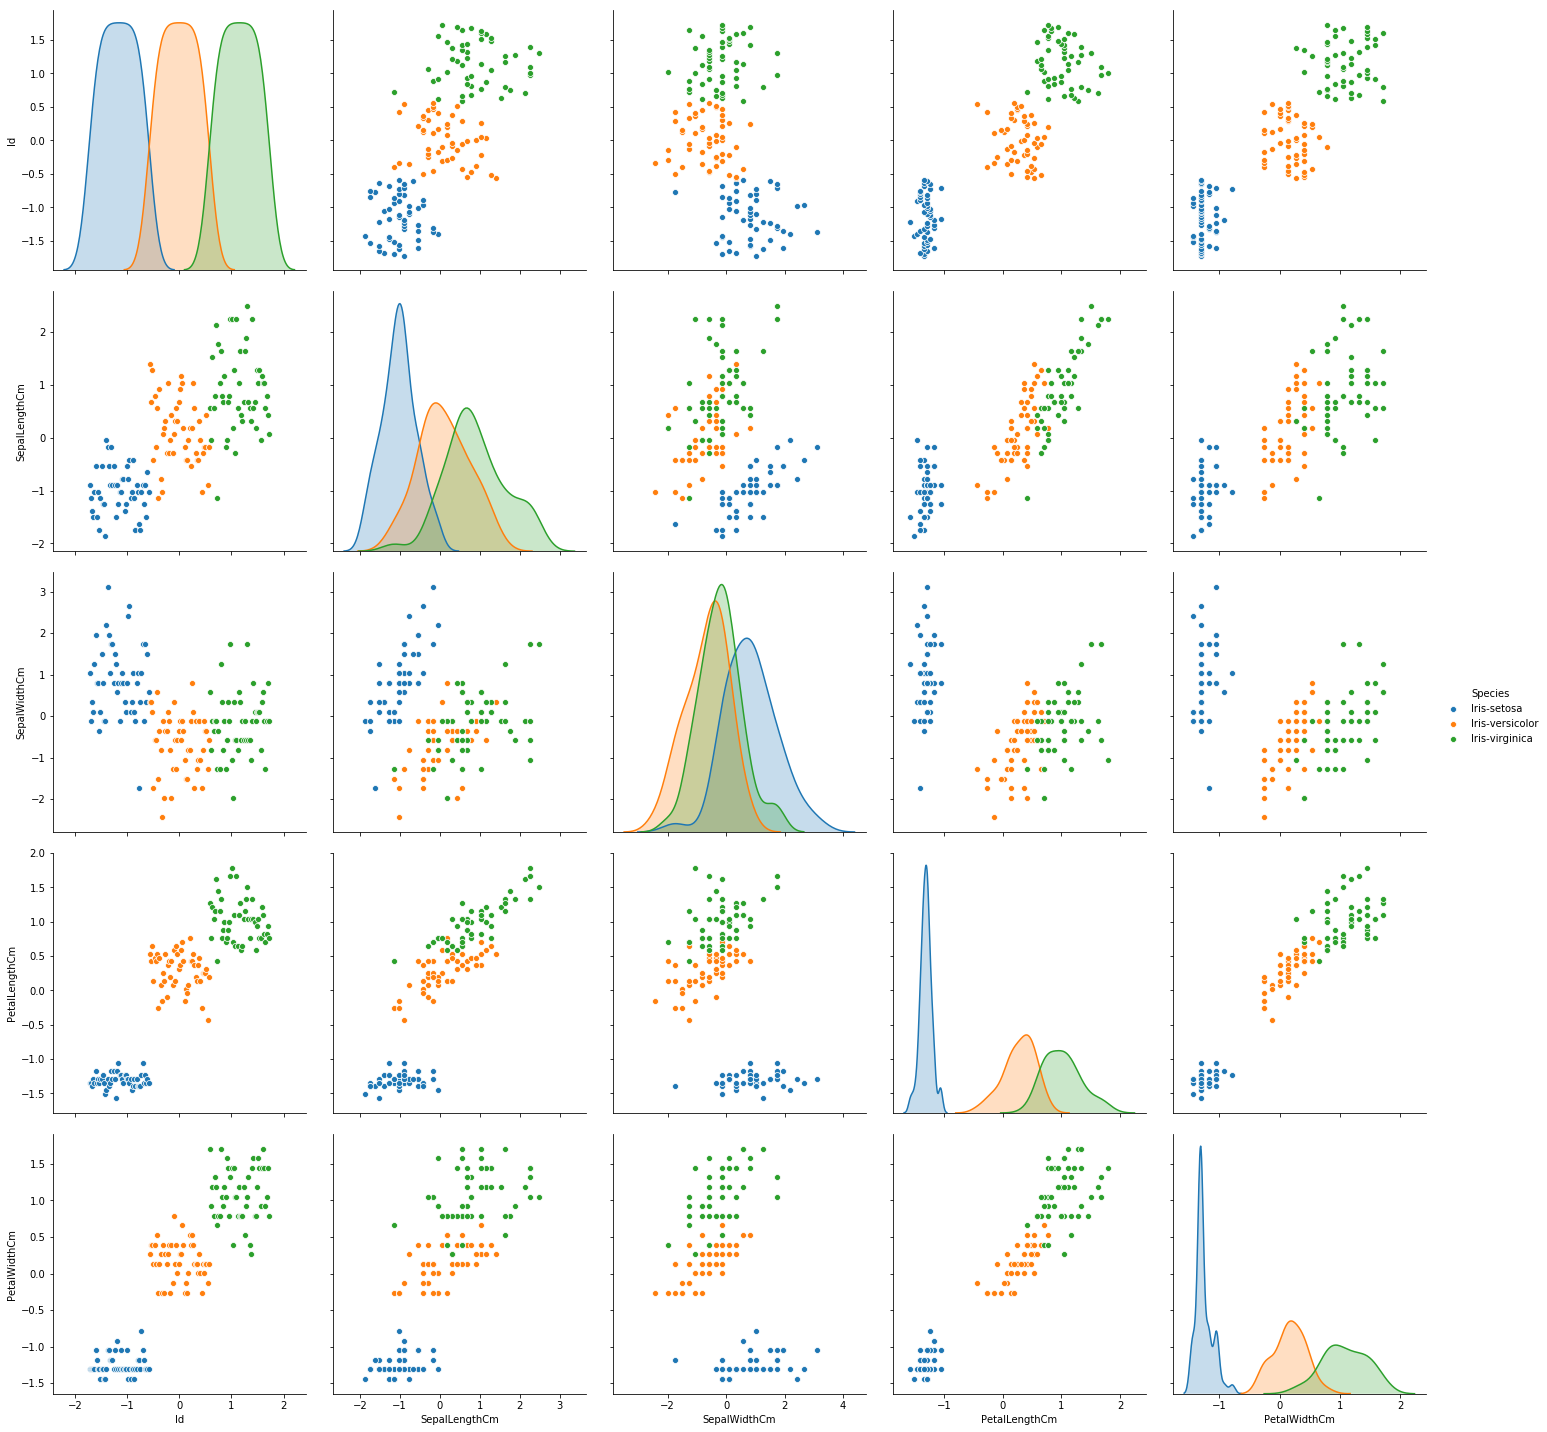

In [19]:
# Let us see if correlation between features remains same after scalling data
df_feat_copy = df_feat.copy()
df_feat_copy['Species'] = df['Species']
df_feat_copy.head()

sns.pairplot(df_feat_copy,hue="Species",size=4)

We can observe that after scaling the data , the correalation between features remains same.
1. We can observe that sepalWidth ranging from 1.5cm to 5cm (in original dataset) is converted to range between -2 to 4 in scalled data
2. We can observe that Id ranging from 0 to 150 (in original dataset) is converted to range between -2 to 2 in scalled data

## Train - Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(scaled_data,df['Species'],test_size=0.30)

## Using KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) #k values
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

We can observe that 
1. algorithm is 'auto' by default, It Finds best suit algo amon kd-tree,ball-tree,brute force etc.
2. leaf_size is 30 by default for kd-tree, ball-tree algo
3. metric is minkowski distance by default, we can choose Euclidean, Manhattan etc.
4. weights is uniform by default, we can choose weighted distance which is weight given as inverse of distance

In [28]:
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


print(confusion_matrix(y_test,pred))

[[19  1  0]
 [ 0 14  0]
 [ 0  0 11]]


In [30]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        20
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



It is observed that with k value 1 , we have got 98 percent accuracy of model.

Since It can be overfit also sometimes with k=1, we can choose right k value using elbow method

## Choosing right K 

Elbow Method: 

We plot the K vs Error for a model, the point from where error seems almost consistent is the right K as It will not overfit or underfit the model

In [77]:
accuracy_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_feat,df['Species'],cv=5)
    accuracy_rate.append(score.mean())


In [63]:
# Getting error rate with cross validation data set
error_rate_cv=[] 

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,scaled_data,df['Species'],cv=5)
    error_rate_cv.append(1-score.mean())


In [64]:
# Getting error rate with normal train , test split

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!= y_test))

#error_rate

## Plotting Error vs K values

### With cross validation

Text(0, 0.5, 'Error rate')

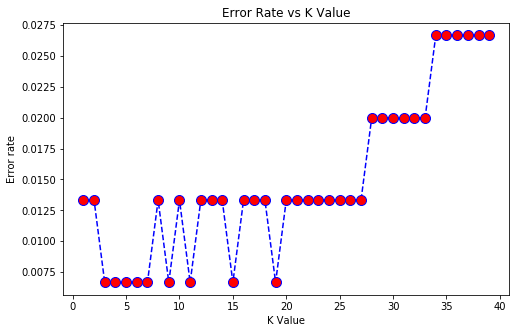

In [71]:
plt.figure(figsize=(8,5))
plt.plot(range(1,40),error_rate_cv,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error rate')

### With normal train,test split

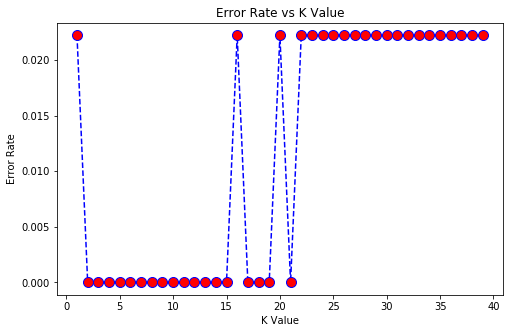

In [72]:
plt.figure(figsize=(8,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

## Plotting Accuracy vs K value

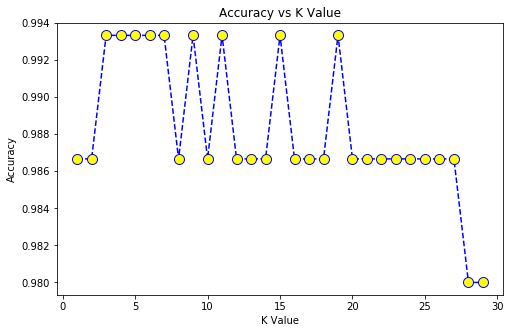

In [78]:
#Accuracy calculated with cross validation data
plt.figure(figsize=(8,5))
plt.plot(range(1,30),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='yellow',markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

It is observed that Accuracy and Error rate with cross validation are exactly mirror graphs becuase
Accuracy = 1-Error

1. It is a elbow kind of graph, we should pick a K value at approximate point from where Accuracy starts decreasing / Error start increasing

2. Example approx K>18 the accuracy starts decreasing, so if we choose this as K value model would not be overfit or underfit

3. If we choose k=5 where accuracy is max, there is chance that model would overfit (low test error / low bias / high variance)
4. If we choose k=35 wher accuracy is min, there is chance that model would underfir (high train error / high bias / low variance)

In [79]:

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[19  1  0]
 [ 0 14  0]
 [ 0  0 11]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        20
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [84]:
# NOW WITH K=18
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[20  0  0]
 [ 0 14  0]
 [ 0  0 11]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

